<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

Загрузить датасет по url:


In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

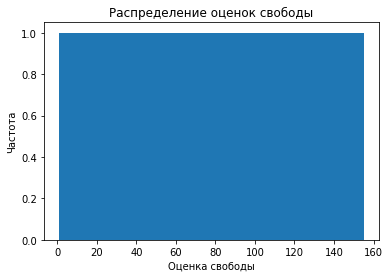

In [30]:
freedom = df['Freedom']
plt.hist(freedom,(len(freedom)-1))
plt.title('Распределение оценок свободы')
plt.xlabel('Оценка свободы')
plt.ylabel('Частота')
plt.show()

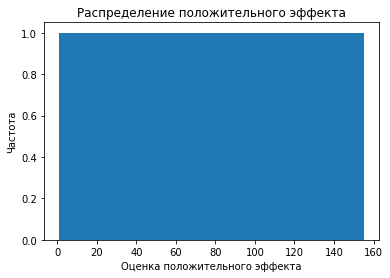

In [31]:
positive = df['Positive affect']
plt.hist(positive,(len(positive)-1))
plt.title('Распределение положительного эффекта')
plt.xlabel('Оценка положительного эффекта')
plt.ylabel('Частота')
plt.show()

Тип распределения - равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [28]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

methods_to_apply = [statistics.median, statistics.mode, statistics.mean, stdev, statistics.pvariance, min, max]
freedom_cleared = freedom[freedom > 0]
for method in methods_to_apply:
    try:
        print(f"{str(method)}: {method(freedom_cleared)}")
    except Exception as e:
        print(f"{str(method)}: {e}")

<function median at 0x1a22f5a2f0>: 78.0
<function mode at 0x1a22f5a510>: no unique mode; found 155 equally common values
<function mean at 0x1a22f5a1e0>: 78.0
<function stdev at 0x1a2486c048>: 44.88875137492688
<function pvariance at 0x1a22f5a6a8>: 2002.0
<built-in function min>: 1.0
<built-in function max>: 155.0


In [32]:
df[freedom.isnull()] #Катар-выброс

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [35]:
#Размах для колонки Freedom
razm=max(freedom)-min(freedom)
razm

154.0

Почему нельзя найти моду?

Моду нельзя найти, т.к. все 155 элементов встречаются 1 раз.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

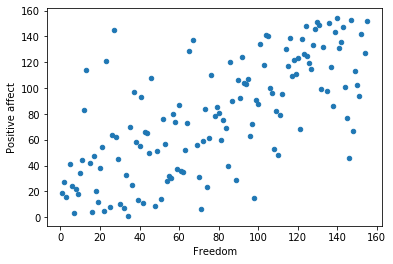

In [38]:
df.dropna().plot(x="Freedom", y="Positive affect", kind="scatter")
plt.show()

In [40]:
from scipy.stats import pearsonr
df_cleared = df.dropna()
corr, p_value = pearsonr(df_cleared["Freedom"], df_cleared["Positive affect"])
print(f'Коэффициент корреляции Пирсона: {corr:1.4} (сильная положительная корреляция '
      '- при увеличении первой переменной вторая также увеличивается)')

Коэффициент корреляции Пирсона: 0.6966 (сильная положительная корреляция - при увеличении первой переменной вторая также увеличивается)


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [42]:
from sklearn import preprocessing

freedom = df.dropna().Freedom
freedom_c = freedom - freedom.mean()
functions_to_apply = [statistics.mean, min, max]
for f in functions_to_apply:
    try:
        print(f"{str(f)}: {f(freedom_c):2.2f}")
    except Exception as e:
        print(f"{str(f)}: {e}")

<function mean at 0x1a22f5a1e0>: 0.00
<built-in function min>: -77.83
<built-in function max>: 76.17


In [43]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_n = min_max_scaler.fit_transform(np.array(freedom_c).reshape(-1, 1))
functions_to_apply = [np.mean, np.min, np.max]
for f in functions_to_apply:
    try:
        print(f"{str(f)}: {f(freedom_n):2.4f}")
    except Exception as e:
        print(f"{str(f)}: {e}")

<function mean at 0x111b53950>: 0.0108
<function amin at 0x111b531e0>: -1.0000
<function amax at 0x111b530d0>: 1.0000


Построить матрицу корреляций для всех колонок таблицы

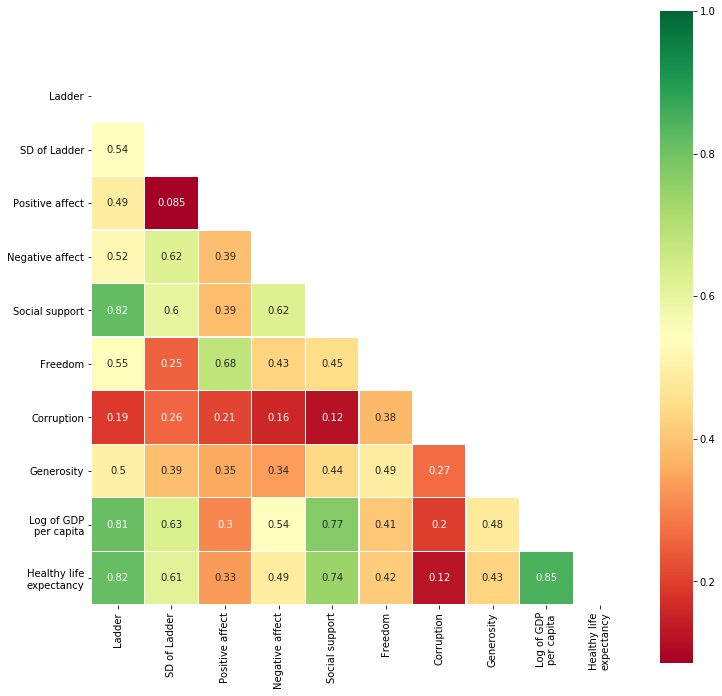

In [49]:
plt.figure(figsize = (12,12))
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

Выделенные насыщенным зеленым цветом квадраты подсвечивают атрибуты с сильной корреляцией: чем выше место страны в рейтинге, тем лучше ее показатели ВВП на душу населения, соц поддержка и продолжительность здоровой жизни (это очевидная корреляция, тк данный рейтинг и составлялся в порядке ранжирования благополучия населения. Высокий ВВП завязан на более высокий уровень соц поддержки, а она в свою очередь влияет на высокий показатель продолжительности здоровой жизни (эта логическая цепочка подтверждается и самой высокой прямой корреляцией 0,85 уровня ВВП и  продолжительностью жизни). 

Загрузить таблицу цен на авокадо: 

In [51]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

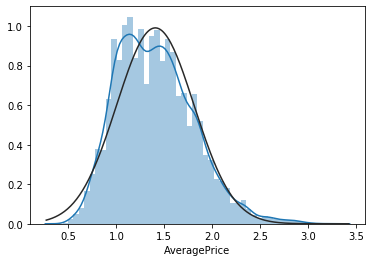

In [52]:
from scipy.stats import norm
sns.distplot(a=df.AveragePrice.dropna(), fit=norm)
plt.show()

Это нормальное распределение, но с ассиметрией.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

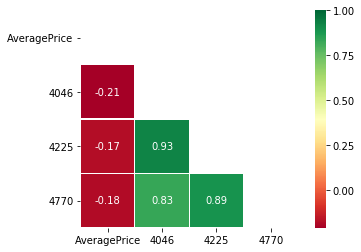

In [53]:
cols = ["AveragePrice","4046","4225","4770"]
corr = df[cols].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

In [ ]:
Цены сортов 4046, 4225 и 4770 сильно коррелируют между собой, но не коррелируют со средней ценой.

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

В анаконде не встал fbprophet, не смог сделать это задание.

In [1]:
pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/33/fb/ad98d46773929079657706e6b2b6e366ba6c282bc2397d8f9b0ea8e5614c/fbprophet-0.5.tar.gz
  ERROR: Complete output from command /Users/Belotelov/anaconda3/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/l2/bstm_6c95rj1tv0fhfvr4s880000gn/T/pip-install-_2sq007j/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/l2/bstm_6c95rj1tv0fhfvr4s880000gn/T/pip-wheel-e7v9btnd --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_861b75c6337e237650a61ae58c4385ef NOW.
  error: command 'gcc' failed with exit status 1
  -------------------------------------

In [1]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'